In [4]:
import numpy as np

In [5]:
from sklearn import linear_model, datasets, tree

In [6]:
import matplotlib.pyplot as plt

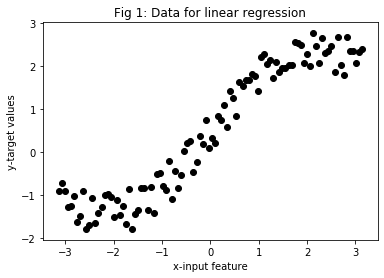

In [7]:
# Doing train_test_split manually including validation 
n = 100
x = np.linspace(-np.pi, np.pi , n)
y = x/2 + np.sin(x) + np.random.random(x.shape)
plt.scatter(x,y, color = 'black')
plt.xlabel('x-input feature')
plt.ylabel('y-target values')
plt.title('Fig 1: Data for linear regression')
plt.show()

In [8]:
random_indices = np.random.permutation(n)
#Training set
x_train = x[random_indices[:70]]
y_train = y[random_indices[:70]]
#Validation set
x_val = x[random_indices[70:85]]
y_val = y[random_indices[70:85]]
#Test set
x_test = x[random_indices[85:]]
y_test = y[random_indices[85:]]

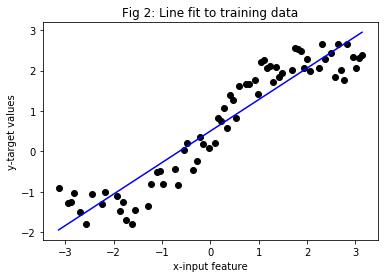

In [9]:
model = linear_model.LinearRegression() #Create a least squared error linear regression object

#sklearn takes the inputs as matrices. Hence we reshpae the arrays into column matrices
x_train_for_line_fitting = np.matrix(x_train.reshape(len(x_train),1))
y_train_for_line_fitting = np.matrix(y_train.reshape(len(y_train),1))

#Fit the line to the training data
model.fit(x_train_for_line_fitting, y_train_for_line_fitting)

#Plot the line
plt.scatter(x_train, y_train, color='black')
plt.plot(x.reshape((len(x),1)),model.predict(x.reshape((len(x),1))),color='blue')
plt.xlabel('x-input feature')
plt.ylabel('y-target values')
plt.title('Fig 2: Line fit to training data')
plt.show()

In [10]:
mean_val_error = np.mean( (y_val - model.predict(x_val.reshape(len(x_val),1)))**2 )
mean_test_error = np.mean( (y_test - model.predict(x_test.reshape(len(x_test),1)))**2 )

print('Validation MSE:' , mean_val_error, '\nTest MSE: ', mean_test_error)

Validation MSE: 2.894573334605674 
Test MSE:  4.930052599215919


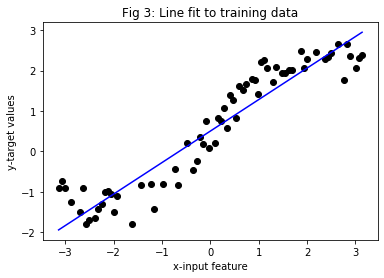

In [12]:
# using train_test_split function
from sklearn.model_selection import train_test_split as tts

x_train1,x_test1,y_train1,y_test1 = tts(x, y, test_size=0.33, random_state=n)
model1 = linear_model.LinearRegression() #Create a least squared error linear regression object

#sklearn takes the inputs as matrices. Hence we reshpae the arrays into column matrices
x_train_for_line_fitting1 = np.matrix(x_train1.reshape(len(x_train1),1))
y_train_for_line_fitting1 = np.matrix(y_train1.reshape(len(y_train1),1))

#Fit the line to the training data
model1.fit(x_train_for_line_fitting1, y_train_for_line_fitting1)

#Plot the line
plt.scatter(x_train1, y_train1, color='black')
plt.plot(x.reshape((len(x),1)),model.predict(x.reshape((len(x),1))),color='blue')
plt.xlabel('x-input feature')
plt.ylabel('y-target values')
plt.title('Fig 3: Line fit to training data')
plt.show()

In [13]:
mean_test_error = np.mean( (y_test - model.predict(x_test.reshape(len(x_test),1)))**2 )
print('Test MSE: ', mean_test_error)

Test MSE:  4.930052599215919
